In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data preparation

In [55]:
mean_01 = ([1, .5])
cov_01 = ([[1, .1], [.1, 1.4]])

mean_02 = ([3, 4.5])
cov_02 = ([[1.2, .1], [.1, 1.3]])

In [56]:
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

## Visualize

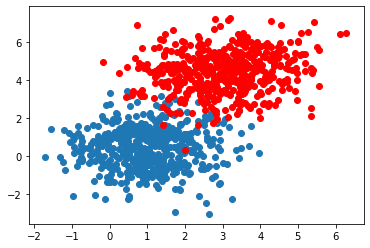

In [57]:
plt.scatter(dist_01[:, 0], dist_01[:, 1])
plt.scatter(dist_02[:, 0], dist_02[:, 1], color = "red")
plt.show()

## Data preprocessing

In [58]:
total = dist_01.shape[0] + dist_02.shape[0]
print(total)

1000


In [59]:
data = np.zeros((total, 3))

In [60]:
data[:500, :-1] = dist_01
data[500:, :-1] = dist_02
data[500:, -1] = 1

In [61]:
np.random.shuffle(data)

In [62]:
# Normalizing
u = np.mean(data[:, :-1])
sigma = np.std(data[:, :-1])

data[:, :-1] = (data[:, :-1] - u)/sigma

In [63]:
print(data)

[[ 0.77226617  1.53572607  1.        ]
 [-0.61067246 -0.59145002  0.        ]
 [-0.15587499  1.39010235  1.        ]
 ...
 [-1.06374495 -0.02317824  0.        ]
 [-1.05712736 -0.64839344  0.        ]
 [-1.18325381 -0.84653007  0.        ]]


In [64]:
ones = np.ones((data.shape[0], 1))

In [65]:
data = np.hstack((ones, data))

In [66]:
print(data)

[[ 1.          0.77226617  1.53572607  1.        ]
 [ 1.         -0.61067246 -0.59145002  0.        ]
 [ 1.         -0.15587499  1.39010235  1.        ]
 ...
 [ 1.         -1.06374495 -0.02317824  0.        ]
 [ 1.         -1.05712736 -0.64839344  0.        ]
 [ 1.         -1.18325381 -0.84653007  0.        ]]


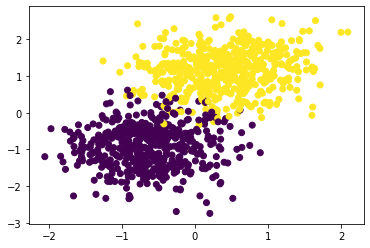

In [67]:
plt.scatter(data[:, 1], data[:, 2], c = data[:, 3])
plt.show()

In [68]:
split = int(.8*total)

In [69]:
x_train = data[:split, :-1]
y_train = data[:split, -1]

x_test = data[split:, :-1]
y_test = data[split:, -1]

print(x_train.shape, y_train.shape)
#print(x_test.shape, y_test.shape)

(800, 3) (800,)


## Logistic Regression

In [70]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [71]:
def hypothesis(x, theta):
    return sigmoid(np.dot(x, theta))

In [72]:
def error(x, y, theta):
    
    m = x.shape[0]
    err = 0
    
    for i in range(m):
        hy = hypothesis(x[i], theta)
        err += y[i]*np.log2(hy) + (1 - y[i])*np.log2(1 - hy)
        
    return err/m

In [73]:
def get_grad(x, y, theta):
    
    m = x.shape[0]
    grad = np.zeros(theta.shape)
    
    for i in range(m):
        hy = hypothesis(x[i], theta)
        x_ = x[i].reshape((-1, 1))
        grad += (y[i] - hy)*x_
        
    return grad/m

In [74]:
def gradient(x, y, learining_rate = .01):
    
    theta = np.zeros((x.shape[1], 1))
    
    err_list = []
    
    for i in range(5000):
        theta = theta + learining_rate*get_grad(x, y, theta)
        e = error(x, y, theta)
        err_list.append(e)
        
    return theta, err_list

In [75]:
ftheta, error = gradient(x_train, y_train)
print(ftheta)

[[-0.08454805]
 [ 1.50577395]
 [ 3.17819978]]


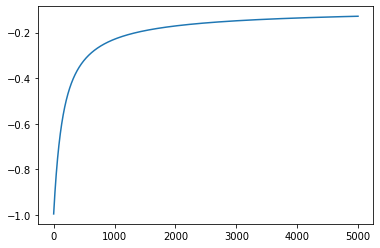

In [76]:
plt.plot(error)
plt.show()